from sklearn.svm import SVC

SVC(C=1.0,kernel='rbf',degree=3,gamma='scale')
1. C：正则化参数。默认值为1.0
* C值越大，对误分类的惩罚越大，从而使模型对训练数据拟合得更好（但可能导致过拟合）。
* C越小，容许训练样本中有一些误分类错误样本，泛化能力强。对于训练样本带有噪声的情况，一般采用后者，把训练样本集中错误分类的样本作为噪声。
* 选择方法：通过交叉验证选择最佳值。一般尝试范围：[0.1, 1, 10, 100]
2. kernel: 核函数
* ‘rbf’：高斯核（默认）
* ‘linear’：线性核函数
* ‘poly’：多项式核函数
* ‘sigmoid’：sigmod核函数
* 选择方法：根据数据特性和实验结果选择。线性可分数据选'linear'，非线性数据尝试'poly', 'rbf', 'sigmoid'
3. gamma: 核函数系数，默认为scale，只对‘rbf’,‘poly’,‘sigmoid’有效。
* gamma越大拟合能力越强，越容易过拟合。反之，拟合能力越弱，越容易欠拟合。
* gamma='scale'：这是默认值，计算方式为 1 / (n_features * X.var())，其中 n_features 是特征数量，X.var() 是数据集的方差。
* gamma='auto'：计算方式为 1 / n_features。
* 选择方法：通过交叉验证选择最佳值。一般尝试范围：{'scale', 'auto'} or [0.0001, 0.001, 0.01, 0.1, 1, 10,100]
4. degree: 多项式核函数的阶数n，默认为3，只对多项式核函数有用
5. coef0：核函数中的偏置项，仅在'poly'和'sigmoid'核时有效。
* 默认值：0.0
* 选择方法：通过交叉验证选择最佳值。一般尝试范围：[0, 1, 10]



## 课堂练习：观察kernel，gamma，C这三个参数对结果的影响

要求：记录四种核函数下，最优C、最优gamma对应的准确率

In [1]:
# from IPython.display import Image
# Image(filename='',width=500,height=500)
# 一个单元格里面所有变量都会输出
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "last"

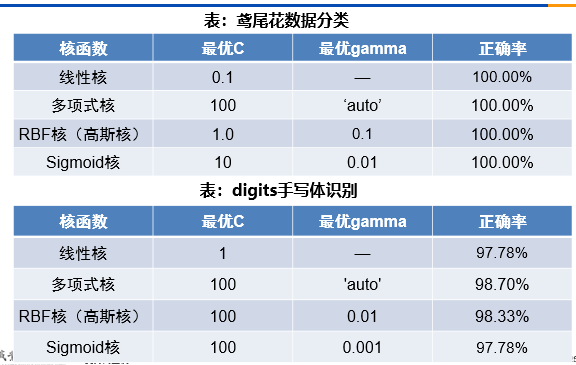
<!-- ![image-4.png](1.png) -->
<!-- 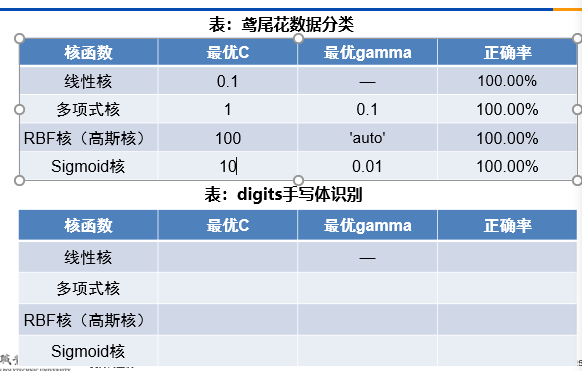
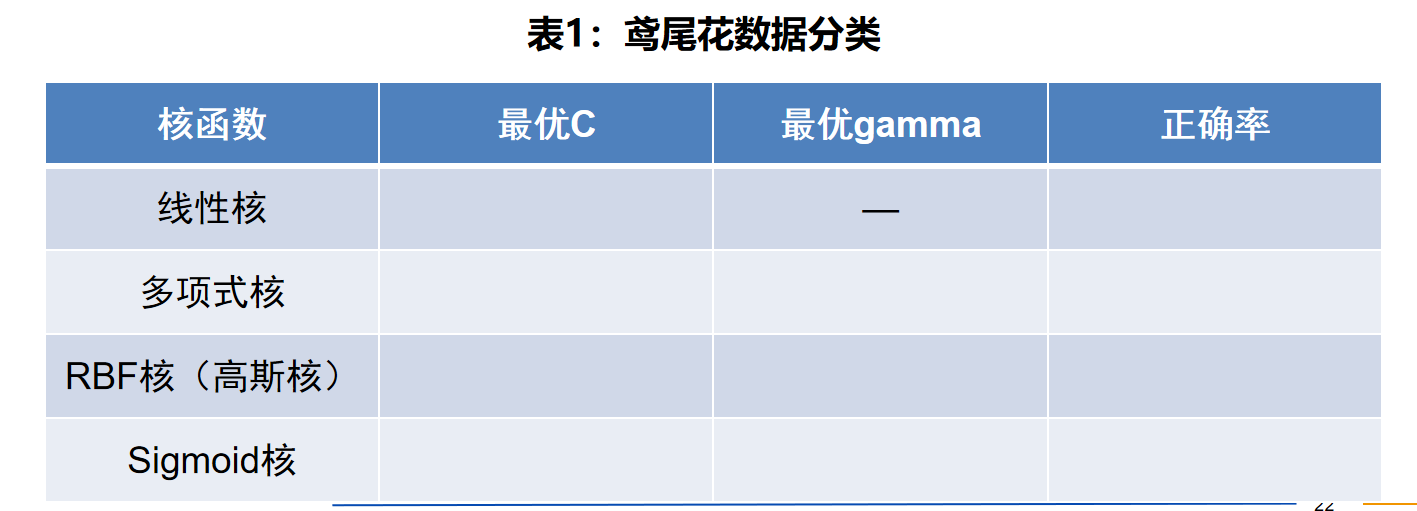
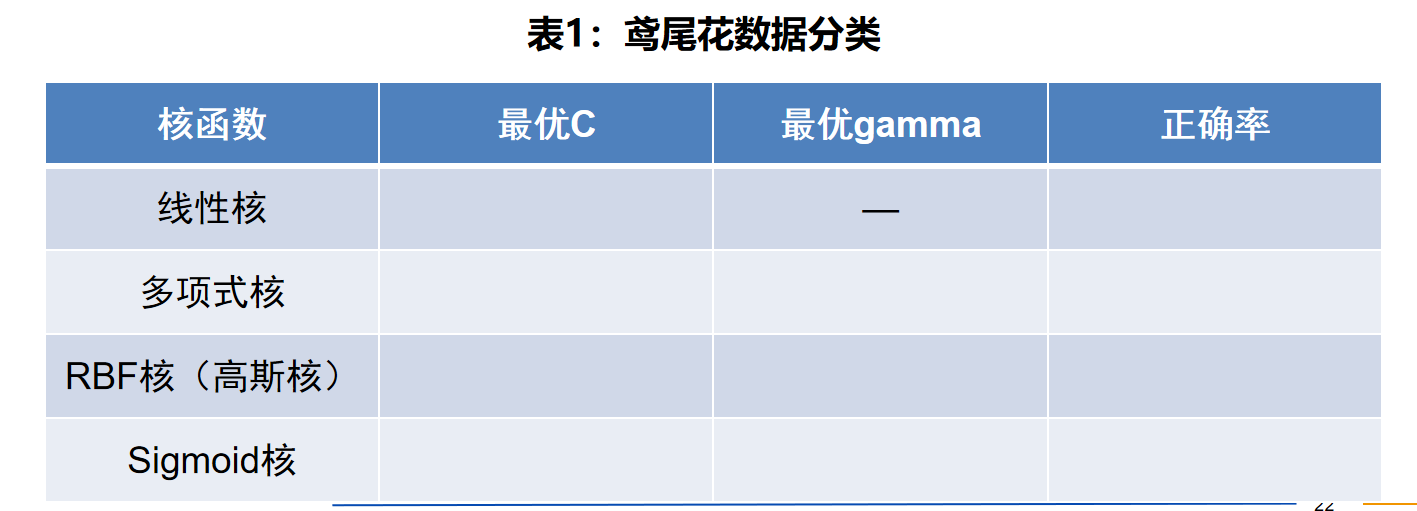
![image.png](1.png) -->

## 案例1 鸢尾花数据集分类

In [2]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
# 加载数据
iris = load_iris()
X = iris.data
y = iris.target
# 数据标准化
scaler = StandardScaler()
X = scaler.fit_transform(X)
# 数据集划分，训练集70%，测试集30%，随机种子42
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)


<!-- SVC(C=1.0,kernel='rbf',degree=3,gamma='scale')
1. C：正则化参数。默认值为1.0
* C值越大，对误分类的惩罚越大，从而使模型对训练数据拟合得更好（但可能导致过拟合）。
* C越小，容许训练样本中有一些误分类错误样本，泛化能力强。对于训练样本带有噪声的情况，一般采用后者，把训练样本集中错误分类的样本作为噪声。
* 选择方法：通过交叉验证选择最佳值。一般尝试范围：[0.1, 1, 10, 100]
2. kernel: 核函数
* ‘rbf’：高斯核（默认）
* ‘linear’：线性核函数
* ‘poly’：多项式核函数
* ‘sigmoid’：sigmod核函数
* 选择方法：根据数据特性和实验结果选择。线性可分数据选'linear'，非线性数据尝试'poly', 'rbf', 'sigmoid'
3. gamma: 核函数系数，默认为scale，只对‘rbf’,‘poly’,‘sigmoid’有效。
* gamma越大拟合能力越强，越容易过拟合。反之，拟合能力越弱，越容易欠拟合。
* gamma='scale'：这是默认值，计算方式为 1 / (n_features * X.var())，其中 n_features 是特征数量，X.var() 是数据集的方差。
* gamma='auto'：计算方式为 1 / n_features。
* 选择方法：通过交叉验证选择最佳值。一般尝试范围：{'scale', 'auto'} or [0.0001, 0.001, 0.01, 0.1, 1, 10,100]
4. degree: 多项式核函数的阶数n，默认为3，只对多项式核函数有用
5. coef0：核函数中的偏置项，仅在'poly'和'sigmoid'核时有效。
* 默认值：0.0
* 选择方法：通过交叉验证选择最佳值。一般尝试范围：[0, 1, 10] -->

In [33]:
# SVM模型：线性分类器
svc_linear=SVC(kernel='linear',C=0.1)
svc_linear.fit(X_train,y_train)
svc_pre=svc_linear.predict(X_test)
print("线性分类器的准确率为：{:.2f}%".format(accuracy_score(y_test,svc_pre)*100))

线性分类器的准确率为：100.00%


In [34]:
# SVM模型：高斯核
svc_rbf=SVC(kernel='rbf',C=1.0,gamma=0.1)
svc_rbf.fit(X_train,y_train)
rbf_pre=svc_rbf.predict(X_test)
print("高斯核分类器的准确率为：{:.2f}%".format(accuracy_score(y_test,rbf_pre)*100))

高斯核分类器的准确率为：100.00%


In [35]:
# SVM模型：多项式核函数
svc_poly=SVC(kernel='poly',C=100,gamma='auto')
svc_poly.fit(X_train,y_train)
poly_pre=svc_poly.predict(X_test)
print("多项式核分类器的准确率为：{:.2f}%".format(accuracy_score(y_test,poly_pre)*100))

多项式核分类器的准确率为：100.00%


In [36]:
# SVM模型：sigmoid核函数
svc_sigmoid=SVC(kernel='sigmoid',C=10,gamma=0.01)
svc_sigmoid.fit(X_train,y_train)
sigmoid_pre=svc_sigmoid.predict(X_test)
print("sigmoid分类器的准确率为：{:.2f}%".format(accuracy_score(y_test,sigmoid_pre)*100))

sigmoid分类器的准确率为：100.00%


## 案例2 digits手写字体识别

In [39]:
from sklearn.datasets import load_digits
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# 加载 Digits 数据集
digits = load_digits()
X, y = digits.data, digits.target

# 数据标准化
scaler = StandardScaler()
X = scaler.fit_transform(X)

# 数据集划分，训练集70%，测试集30%，随机种子42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [45]:
# SVM模型：线性分类器
svc_linear=SVC(kernel='linear',C=1)
svc_linear.fit(X_train,y_train)
svc_pre=svc_linear.predict(X_test)
print("线性分类器的准确率为：{:.2f}%".format(accuracy_score(y_test,svc_pre)*100))

线性分类器的准确率为：97.78%


In [70]:
# SVM模型：高斯核
svc_rbf=SVC(kernel='rbf',C=100,gamma=0.01)
svc_rbf.fit(X_train,y_train)
rbf_pre=svc_rbf.predict(X_test)
print("高斯核分类器的准确率为：{:.2f}%".format(accuracy_score(y_test,rbf_pre)*100))

高斯核分类器的准确率为：98.33%


In [48]:
# SVM模型：多项式核函数
svc_poly=SVC(kernel='poly',C=100,gamma='auto')
svc_poly.fit(X_train,y_train)
poly_pre=svc_poly.predict(X_test)
print("多项式核分类器的准确率为：{:.2f}%".format(accuracy_score(y_test,poly_pre)*100))

多项式核分类器的准确率为：98.70%


In [75]:
# SVM模型：sigmoid核函数
svc_sigmoid=SVC(kernel='sigmoid',C=100,gamma=0.001)
svc_sigmoid.fit(X_train,y_train)
sigmoid_pre=svc_sigmoid.predict(X_test)
print("sigmoid分类器的准确率为：{:.2f}%".format(accuracy_score(y_test,sigmoid_pre)*100))

sigmoid分类器的准确率为：97.78%


# 超参数调优

## 案例3：自动调参
使用支持向量机（SVM）对鸢尾花（Iris）数据集进行分类。目标是通过不同的超参数组合来找到最佳的SVM模型配置，并记录最佳参数及其性能。
###### 1、数据准备：加载鸢尾花数据集，划分为70%的训练集和30%的测试集，随机种子设置为42。
###### 2、数据预处理：对数据进行标准化处理，以确保模型不会因特征的尺度差异而偏向某些特征。
###### 3、模型训练与验证：
######   （1）定义SVM的参数网格。参数包括：kernel: 核函数类型（'linear', 'rbf', 'poly', 'sigmoid'）；C: 正则化参数（0.1, 1, 10, 100）；gamma: 核函数的系数（0.01, 0.1, 1, 10, 100）
######  （2）使用所有可能的参数组合训练SVM模型，并在测试集上评估其性能。
###### 4、性能评估：确定并打印达到最高准确率的参数组合和最高的准确率。

In [105]:
import itertools
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from pprint import pprint

# 加载数据
iris = load_iris()
X = iris.data
y = iris.target
# 数据标准化
scaler = StandardScaler()
X = scaler.fit_transform(X)
# 数据集划分，训练集70%，测试集30%，随机种子42
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

# 定义参数网格
param_grid={
    'kernel': ['linear', 'rbf', 'poly','sigmoid'],
    'C': [0.1, 1.0, 10, 100],
    'gamma': [0.01, 0.1, 1, 10, 100]
}#3*4*5+4

# 网格搜索和交叉验证
param_conbinations=[]
for kernel in param_grid['kernel']:
    if kernel=='linear':
        for c in param_grid['C']:
            param_conbinations.append({'kernel':'linear','C':c})
    elif kernel=='poly':
        for c,gamma in itertools.product(param_grid['C'],param_grid['gamma']):
            param_conbinations.append({'kernel':'poly','C':c,'gamma':gamma})
    elif kernel=='rbf':
        for c,gamma in itertools.product(param_grid['C'],param_grid['gamma']):
            param_conbinations.append({'kernel':'rbf','C':c,'gamma':gamma})
    elif kernel=='sigmoid':
        for c,gamma in itertools.product(param_grid['C'],param_grid['gamma']):
            param_conbinations.append({'kernel':'sigmoid','C':c,'gamma':gamma})
best_params=[]
best_accuracy=0
for param in param_conbinations:
    # SVM模型
    svc=SVC(**param)  #解包字典，将字典的keys作为一个关键字参数名，假设字典params={'kernel': 'linear', 'C': 0.1}，那么SVC(**params)
    #等于SVC(kernel='linear',C=0.1)
    svc.fit(X_train,y_train)
    # 性能评估
    accuracy=accuracy_score(y_test,svc.predict(X_test))
    # 记录最好的参数及其性能
    if accuracy>best_accuracy:
        best_accuracy=accuracy
        best_params=param
    if accuracy>0.95:
        print(param)
        
# 打印最好的参数及其性能
print("最好的参数：", best_params)
print("最高准确率：{:.2f}%".format(best_accuracy*100))

{'kernel': 'linear', 'C': 0.1}
{'kernel': 'linear', 'C': 1.0}
{'kernel': 'linear', 'C': 10}
{'kernel': 'linear', 'C': 100}
{'kernel': 'rbf', 'C': 0.1, 'gamma': 1}
{'kernel': 'rbf', 'C': 1.0, 'gamma': 0.1}
{'kernel': 'rbf', 'C': 1.0, 'gamma': 1}
{'kernel': 'rbf', 'C': 10, 'gamma': 0.01}
{'kernel': 'rbf', 'C': 10, 'gamma': 0.1}
{'kernel': 'rbf', 'C': 10, 'gamma': 1}
{'kernel': 'rbf', 'C': 100, 'gamma': 0.01}
{'kernel': 'rbf', 'C': 100, 'gamma': 0.1}
{'kernel': 'rbf', 'C': 100, 'gamma': 1}
{'kernel': 'poly', 'C': 0.1, 'gamma': 1}
{'kernel': 'poly', 'C': 0.1, 'gamma': 10}
{'kernel': 'poly', 'C': 0.1, 'gamma': 100}
{'kernel': 'poly', 'C': 1.0, 'gamma': 1}
{'kernel': 'poly', 'C': 1.0, 'gamma': 10}
{'kernel': 'poly', 'C': 1.0, 'gamma': 100}
{'kernel': 'poly', 'C': 10, 'gamma': 0.1}
{'kernel': 'poly', 'C': 10, 'gamma': 1}
{'kernel': 'poly', 'C': 10, 'gamma': 10}
{'kernel': 'poly', 'C': 10, 'gamma': 100}
{'kernel': 'poly', 'C': 100, 'gamma': 0.1}
{'kernel': 'poly', 'C': 100, 'gamma': 1}
{'kerne

### 案例4
#### 使用支持向量机（SVM）对手写数据集（digits）进行分类。目标是通过不同的超参数组合来找到最佳的SVM模型配置，并记录最佳参数及其性能。
#### 手写数字数据集包含1797个样本，每个样本具有64个特征，表示8x8像素的图像。目标变量是数字0-9的分类标签。

In [113]:
import itertools
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from pprint import pprint  #数据美化输出

# 加载数据集
digits = load_digits()
X, y = digits.data, digits.target

# 数据标准化
scaler = StandardScaler()
X = scaler.fit_transform(X)
# 数据集划分，训练集70%，测试集30%，随机种子42
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

# 定义参数网格
param_grid={
    'kernel': ['linear', 'rbf', 'poly','sigmoid'],
    'C': [0.1, 1.0, 10, 100],
    'gamma': [0.01, 0.1, 1, 10, 100]
}#3*4*5+4

# 网格搜索和交叉验证
param_conbinations=[]
for kernel in param_grid['kernel']:
    if kernel=='linear':
        for c in param_grid['C']:
            param_conbinations.append({'kernel':'linear','C':c})
    elif kernel=='poly':
        for c,gamma in itertools.product(param_grid['C'],param_grid['gamma']):
            param_conbinations.append({'kernel':'poly','C':c,'gamma':gamma})
    elif kernel=='rbf':
        for c,gamma in itertools.product(param_grid['C'],param_grid['gamma']):
            param_conbinations.append({'kernel':'rbf','C':c,'gamma':gamma})
    elif kernel=='sigmoid':
        for c,gamma in itertools.product(param_grid['C'],param_grid['gamma']):
            param_conbinations.append({'kernel':'sigmoid','C':c,'gamma':gamma})
best_params=[]
best_accuracy=0
for param in param_conbinations:
    # SVM模型
    svc=SVC(**param)  #解包字典，将字典的keys作为一个关键字参数名，假设字典params={'kernel': 'linear', 'C': 0.1}，那么SVC(**params)
    #等于SVC(kernel='linear',C=0.1)
    svc.fit(X_train,y_train)
    # 性能评估
    accuracy=accuracy_score(y_test,svc.predict(X_test))
    # 记录最好的参数及其性能
    if accuracy>best_accuracy:
        best_accuracy=accuracy
        best_params=param
    if accuracy>0.95:
        pprint(param)
        
# 打印最好的参数及其性能
print("最好的参数：", best_params)
print("最高准确率：{:.2f}%".format(best_accuracy*100))

{'C': 0.1, 'kernel': 'linear'}
{'C': 1.0, 'kernel': 'linear'}
{'C': 10, 'kernel': 'linear'}
{'C': 100, 'kernel': 'linear'}
{'C': 1.0, 'gamma': 0.01, 'kernel': 'rbf'}
{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
{'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
{'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}
{'C': 0.1, 'gamma': 0.1, 'kernel': 'poly'}
{'C': 0.1, 'gamma': 1, 'kernel': 'poly'}
{'C': 0.1, 'gamma': 10, 'kernel': 'poly'}
{'C': 0.1, 'gamma': 100, 'kernel': 'poly'}
{'C': 1.0, 'gamma': 0.1, 'kernel': 'poly'}
{'C': 1.0, 'gamma': 1, 'kernel': 'poly'}
{'C': 1.0, 'gamma': 10, 'kernel': 'poly'}
{'C': 1.0, 'gamma': 100, 'kernel': 'poly'}
{'C': 10, 'gamma': 0.01, 'kernel': 'poly'}
{'C': 10, 'gamma': 0.1, 'kernel': 'poly'}
{'C': 10, 'gamma': 1, 'kernel': 'poly'}
{'C': 10, 'gamma': 10, 'kernel': 'poly'}
{'C': 10, 'gamma': 100, 'kernel': 'poly'}
{'C': 100, 'gamma': 0.01, 'kernel': 'poly'}
{'C': 100, 'gamma': 0.1, 'kernel': 'poly'}
{'C': 100, 'gamma': 1, 'kernel': 

### 案例5
#### 应用支持向量机（SVM）对红酒数据集进行分类，并通过超参数调优寻找最优的模型配置。
#### 红酒数据集包含178个样本，每个样本具有13个化学属性，如酒精含量、苹果酸含量等。目标变量是葡萄酒的3种不同分类。

In [111]:
import itertools
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from pprint import pprint

# 加载数据集
wine = load_wine()
X, y = wine.data, wine.target

# 数据标准化
scaler = StandardScaler()
X = scaler.fit_transform(X)
# 数据集划分，训练集70%，测试集30%，随机种子42
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

# 定义参数网格
param_grid={
    'kernel': ['linear', 'rbf', 'poly','sigmoid'],
    'C': [0.1, 1.0, 10, 100],
    'gamma': [0.01, 0.1, 1, 10, 100]
}#3*4*5+4

# 网格搜索和交叉验证
param_conbinations=[]
for kernel in param_grid['kernel']:
    if kernel=='linear':
        for c in param_grid['C']:
            param_conbinations.append({'kernel':'linear','C':c})
    elif kernel=='poly':
        for c,gamma in itertools.product(param_grid['C'],param_grid['gamma']):
            param_conbinations.append({'kernel':'poly','C':c,'gamma':gamma})
    elif kernel=='rbf':
        for c,gamma in itertools.product(param_grid['C'],param_grid['gamma']):
            param_conbinations.append({'kernel':'rbf','C':c,'gamma':gamma})
    elif kernel=='sigmoid':
        for c,gamma in itertools.product(param_grid['C'],param_grid['gamma']):
            param_conbinations.append({'kernel':'sigmoid','C':c,'gamma':gamma})
best_params=[]
best_accuracy=0
for param in param_conbinations:
    # SVM模型
    svc=SVC(**param)  #解包字典，将字典的keys作为一个关键字参数名，假设字典params={'kernel': 'linear', 'C': 0.1}，那么SVC(**params)
    #等于SVC(kernel='linear',C=0.1)
    svc.fit(X_train,y_train)
    # 性能评估
    accuracy=accuracy_score(y_test,svc.predict(X_test))
    # 记录最好的参数及其性能
    if accuracy>best_accuracy:
        best_accuracy=accuracy
        best_params=param
    if accuracy>0.95:
        print(param)
        
# 打印最好的参数及其性能
print("最好的参数：", best_params)
print("最高准确率：{:.2f}%".format(best_accuracy*100))

{'kernel': 'linear', 'C': 0.1}
{'kernel': 'linear', 'C': 1.0}
{'kernel': 'linear', 'C': 10}
{'kernel': 'linear', 'C': 100}
{'kernel': 'rbf', 'C': 0.1, 'gamma': 0.1}
{'kernel': 'rbf', 'C': 1.0, 'gamma': 0.01}
{'kernel': 'rbf', 'C': 1.0, 'gamma': 0.1}
{'kernel': 'rbf', 'C': 10, 'gamma': 0.01}
{'kernel': 'rbf', 'C': 10, 'gamma': 0.1}
{'kernel': 'rbf', 'C': 100, 'gamma': 0.01}
{'kernel': 'rbf', 'C': 100, 'gamma': 0.1}
{'kernel': 'poly', 'C': 0.1, 'gamma': 1}
{'kernel': 'poly', 'C': 0.1, 'gamma': 10}
{'kernel': 'poly', 'C': 0.1, 'gamma': 100}
{'kernel': 'poly', 'C': 1.0, 'gamma': 0.1}
{'kernel': 'poly', 'C': 1.0, 'gamma': 1}
{'kernel': 'poly', 'C': 1.0, 'gamma': 10}
{'kernel': 'poly', 'C': 1.0, 'gamma': 100}
{'kernel': 'poly', 'C': 10, 'gamma': 0.1}
{'kernel': 'poly', 'C': 10, 'gamma': 1}
{'kernel': 'poly', 'C': 10, 'gamma': 10}
{'kernel': 'poly', 'C': 10, 'gamma': 100}
{'kernel': 'poly', 'C': 100, 'gamma': 0.1}
{'kernel': 'poly', 'C': 100, 'gamma': 1}
{'kernel': 'poly', 'C': 100, 'gamma': 

In [112]:
from sklearn.linear_model import LogisticRegression
# 训练 Softmax 回归模型
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=200)
model.fit(X_train, y_train)

# 预测并评估模型
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)


print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 98.15%


c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


## 案例6：人脸识别

特征数据的大小为： (2414, 1024) 目标数据的大小为： (2414, 1)


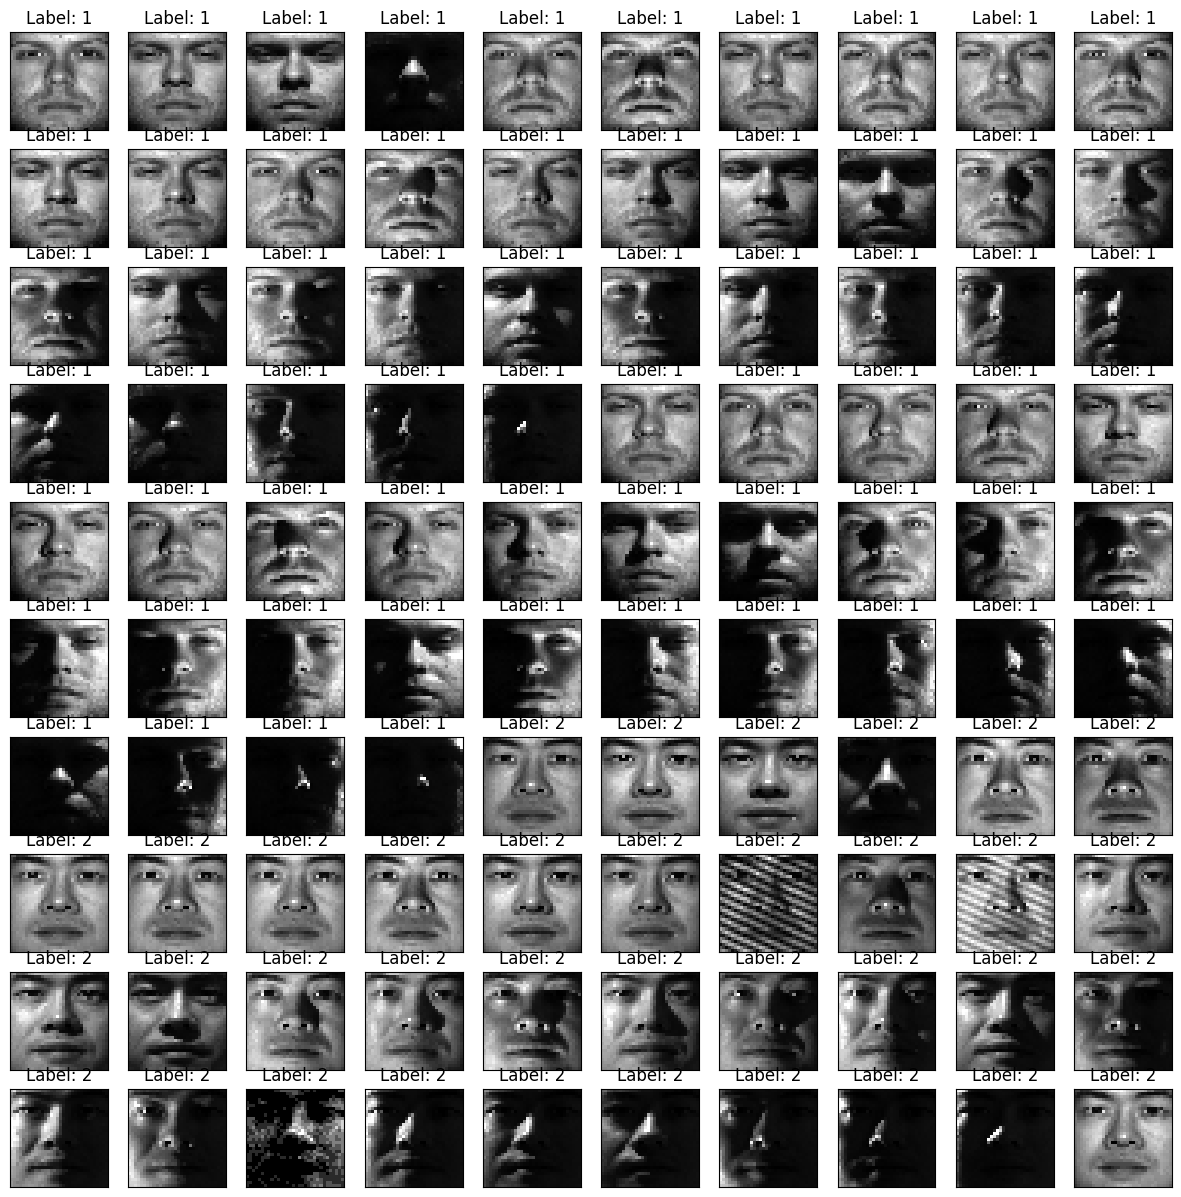

In [4]:
# 导入所需的库
from scipy.io import loadmat  # 用于加载.mat格式的数据文件
import matplotlib.pyplot as plt  # 用于数据可视化

# 数据导入
x = loadmat('datasets\YaleB_32x32.mat')  # 加载.mat文件，此文件包含人脸数据集
fea = x['fea']  # 从加载的数据中提取特征数据，即人脸图像的像素值
gnd = x['gnd']  # 从加载的数据中提取标签数据，即每个图像对应的类别标签

# 打印特征和标签数据的维度信息，以确认数据的规模和形状
print("特征数据的大小为：",fea.shape,"目标数据的大小为：",gnd.shape)

# 可视化前几个图像
fig, axes = plt.subplots(10, 10, figsize=(15, 15), subplot_kw={'xticks': [], 'yticks': []})  # 创建一个图形和一组子图，每个子图用于显示一个人脸图像
for i, ax in enumerate(axes.flat):  # 遍历子图对象，并通过索引访问对应的图像数据
    img = fea[i].reshape(32, 32).T  # 将一维图像数据重新形状为32x32的矩阵并转置，以正确显示图像
    ax.imshow(img, cmap='gray')  # 在子图上显示图像，使用灰度颜色映射
    ax.set_title(f'Label: {gnd[i][0]}')  # 设置每个子图的标题，显示图像对应的标签

plt.show()  # 显示整个图形，包括所有子图

### 任务（独立完成）：对YaleB数据集进行人脸识别，达到以下要求：
1. 导入必要的库         （10分）
2. 读取dataset文件夹下的YaleB_32x32.mat数据集  （10分）
3. 划分训练集和测试集（选择每一类的前50张作为训练集，剩下的作为测试集）（10分）
4. 生成参数组合  （10分）
5. 利用不同的参数组合训练svm模型     （15分）
5. 利用不同的参数组合对测试集进行预测    （15分）
6. 在每组参数下，输出在测试集上的正确率    （10分）
7. 输出最高正确率及最佳参数，正确率越高，分数越高。（10-20分）

In [26]:
# 导入所需的库
from scipy.io import loadmat 
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import itertools

# 数据导入
x = loadmat('datasets\YaleB_32x32.mat')  # 加载.mat文件，此文件包含人脸数据集
X = x['fea']  # 从加载的数据中提取特征数据，即人脸图像的像素值
y = x['gnd']  # 从加载的数据中提取标签数据，即每个图像对应的类别标签
print(X[:3])
print(np.unique(y))

# 打印特征和标签数据的维度信息，以确认数据的规模和形状
print("特征数据的大小为：",X.shape,"目标数据的大小为：",y.shape)

# 数据标准化
# scaler = StandardScaler()
# X = scaler.fit_transform(X)

# 数据集划分，训练集70%，测试集30%，随机种子42
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

[[82 81 72 ... 35 33 22]
 [86 86 74 ... 20 14  9]
 [76 88 80 ...  9  6  6]]
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38]
特征数据的大小为： (2414, 1024) 目标数据的大小为： (2414, 1)


In [32]:
# 获取所有不同的类别标签
classes = np.unique(y)

# 初始化训练集和测试集的列表
X_train_list = []
y_train_list = []
X_test_list = []
y_test_list = []

# 对于每个类别，选择前50个样本作为训练集，剩下的作为测试集
for cls in classes:
    # 获取当前类别的所有索引
    class_indices = np.where(y == cls)[0]
    np.random.shuffle(class_indices)  # 随机打乱当前类别的样本
    
    # 确保当前类别至少有50个样本
    if len(class_indices) >= 50:
        # 选择前50个样本作为训练集
        train_indices = class_indices[:50]
        # 剩下的样本作为测试集
        test_indices = class_indices[50:]
    else:
        # 如果当前类别的样本少于50个，全部作为测试集
        train_indices = class_indices
        test_indices = []
    
    # 根据索引获取训练集和测试集的特征和标签
    X_train_list.append(X[train_indices])
    y_train_list.append(np.zeros_like(train_indices) + cls)
    X_test_list.append(X[test_indices])
    y_test_list.append(np.zeros_like(test_indices) + cls)

# 将列表转换为数组
X_train = np.concatenate(X_train_list)
y_train = np.concatenate(y_train_list)
X_test = np.concatenate(X_test_list)
y_test = np.concatenate(y_test_list)
# X_train, X_test, y_train, y_test=X[train_indices,:], X[test_indices,:], y[train_indices,:], y[test_indices,:]

# 打印划分后的数据集大小
print("训练集特征数据的大小为：", X_train.shape)
print("训练集目标数据的大小为：", y_train.shape)
print("测试集特征数据的大小为：", X_test.shape)
print("测试集目标数据的大小为：", y_test.shape)

# 数据标准化
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)  # 注意这里使用transform而不是fit_transform

# 接下来可以进行模型训练和评估
# 例如，使用支持向量机(SVM)进行分类
svc = SVC(kernel='linear',C=0.1)
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
print(f"模型的准确率为：: {accuracy_score(y_test, y_pred) * 100:.2f}%")

# 定义参数网格
param_grid={
    'kernel': ['linear', 'rbf', 'poly','sigmoid'],
    'C': [0.1, 1.0, 10, 100],
    'gamma': [0.01, 0.1, 1, 10, 100]
}#3*4*5+4

# 网格搜索和交叉验证
param_conbinations=[]
for kernel in param_grid['kernel']:
    if kernel=='linear':
        for c in param_grid['C']:
            param_conbinations.append({'kernel':'linear','C':c})
    elif kernel=='poly':
        for c,gamma in itertools.product(param_grid['C'],param_grid['gamma']):
            param_conbinations.append({'kernel':'poly','C':c,'gamma':gamma})
    elif kernel=='rbf':
        for c,gamma in itertools.product(param_grid['C'],param_grid['gamma']):
            param_conbinations.append({'kernel':'rbf','C':c,'gamma':gamma})
    elif kernel=='sigmoid':
        for c,gamma in itertools.product(param_grid['C'],param_grid['gamma']):
            param_conbinations.append({'kernel':'sigmoid','C':c,'gamma':gamma})
best_params=[]
best_accuracy=0
for param in param_conbinations:
    # SVM模型
    svc=SVC(**param)  #解包字典，将字典的keys作为一个关键字参数名，假设字典params={'kernel': 'linear', 'C': 0.1}，那么SVC(**params)
    #等于SVC(kernel='linear',C=0.1)
    svc.fit(X_train,y_train)
    # 性能评估
    accuracy=accuracy_score(y_test,svc.predict(X_test))
    # 记录最好的参数及其性能
    if accuracy>best_accuracy:
        best_accuracy=accuracy
        best_params=param
    if accuracy>0.95:
        print(param)
        
# 打印最好的参数及其性能
print("最好的参数：", best_params)
print("最高准确率：{:.2f}%".format(best_accuracy*100))

训练集特征数据的大小为： (1900, 1024)
训练集目标数据的大小为： (1900,)
测试集特征数据的大小为： (514, 1024)
测试集目标数据的大小为： (514,)
模型的准确率为：: 95.91%
{'kernel': 'linear', 'C': 0.1}
最好的参数： {'kernel': 'linear', 'C': 0.1}
最高准确率：95.91%


In [33]:
#老师的版本
# 获取所有不同的类别标签
classes = np.unique(y)
idx_train=[]
for i in classes:
    in_k=np.where(y==i)[0]
    np.random.shuffle(in_k)
    idx_train.append(in_k[:50])
idx_train=np.array(idx_train).ravel()
idx_test=np.setdiff1d(np.arange(len(y)),idx_train)
X_train, X_test, y_train, y_test=X[idx_train,:], X[idx_test,:], y[idx_train,:], y[idx_test,:]

# 打印划分后的数据集大小
print("训练集特征数据的大小为：", X_train.shape)
print("训练集目标数据的大小为：", y_train.shape)
print("测试集特征数据的大小为：", X_test.shape)
print("测试集目标数据的大小为：", y_test.shape)

# 数据标准化
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)  # 注意这里使用transform而不是fit_transform

# 接下来可以进行模型训练和评估
# 例如，使用支持向量机(SVM)进行分类
svc = SVC(kernel='linear',C=0.1)
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
print(f"模型的准确率为：: {accuracy_score(y_test, y_pred) * 100:.2f}%")

# # 定义参数网格
# param_grid={
#     'kernel': ['linear', 'rbf', 'poly','sigmoid'],
#     'C': [0.1, 1.0, 10, 100],
#     'gamma': [0.01, 0.1, 1, 10, 100]
# }#3*4*5+4

# # 网格搜索和交叉验证
# param_conbinations=[]
# for kernel in param_grid['kernel']:
#     if kernel=='linear':
#         for c in param_grid['C']:
#             param_conbinations.append({'kernel':'linear','C':c})
#     elif kernel=='poly':
#         for c,gamma in itertools.product(param_grid['C'],param_grid['gamma']):
#             param_conbinations.append({'kernel':'poly','C':c,'gamma':gamma})
#     elif kernel=='rbf':
#         for c,gamma in itertools.product(param_grid['C'],param_grid['gamma']):
#             param_conbinations.append({'kernel':'rbf','C':c,'gamma':gamma})
#     elif kernel=='sigmoid':
#         for c,gamma in itertools.product(param_grid['C'],param_grid['gamma']):
#             param_conbinations.append({'kernel':'sigmoid','C':c,'gamma':gamma})
# best_params=[]
# best_accuracy=0
# for param in param_conbinations:
#     # SVM模型
#     svc=SVC(**param)  #解包字典，将字典的keys作为一个关键字参数名，假设字典params={'kernel': 'linear', 'C': 0.1}，那么SVC(**params)
#     #等于SVC(kernel='linear',C=0.1)
#     svc.fit(X_train,y_train)
#     # 性能评估
#     accuracy=accuracy_score(y_test,svc.predict(X_test))
#     # 记录最好的参数及其性能
#     if accuracy>best_accuracy:
#         best_accuracy=accuracy
#         best_params=param
#     if accuracy>0.95:
#         print(param)
        
# # 打印最好的参数及其性能
# print("最好的参数：", best_params)
# print("最高准确率：{:.2f}%".format(best_accuracy*100))

训练集特征数据的大小为： (1900, 1024)
训练集目标数据的大小为： (1900, 1)
测试集特征数据的大小为： (514, 1024)
测试集目标数据的大小为： (514, 1)


c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


模型的准确率为：: 96.30%
